# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('dataset/NVDA.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [ ]:
X_train = []
y_train = []
for i in range(60, 6591):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [6]:
import keras._tf_keras.keras as keras
from keras._tf_keras.keras.models import Sequential
from keras._tf_keras.keras.layers import Dense, LSTM, Dropout

### Initialising the RNN

In [7]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [8]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

d:\Projects\CPD-Project\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Adding a second LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [12]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [13]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [14]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 0.0039
Epoch 2/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 7.7198e-04
Epoch 3/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 8.2251e-04
Epoch 4/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 7.2093e-04
Epoch 5/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 5.1867e-04
Epoch 6/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 6.7707e-04
Epoch 7/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 8.8795e-04
Epoch 8/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 6.3276e-04
Epoch 9/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 5.0971e-04
Epoch 10/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 5.9259e-04
Epoch 11/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 5.9330e-04
Epoch 12/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 4.9837e-04
Epoch 13/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 5.4459e-04
Epoch 14/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [ ]:
dataset_test = pd.read_csv('dataset/NVDA.csv')
real_stock_price = dataset_test.iloc[6591:6611, 1:2].values

### Getting the predicted stock price of 2017

In [23]:
dataset_total = pd.concat((dataset_train['open'], dataset_test['open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


### Visualising the results

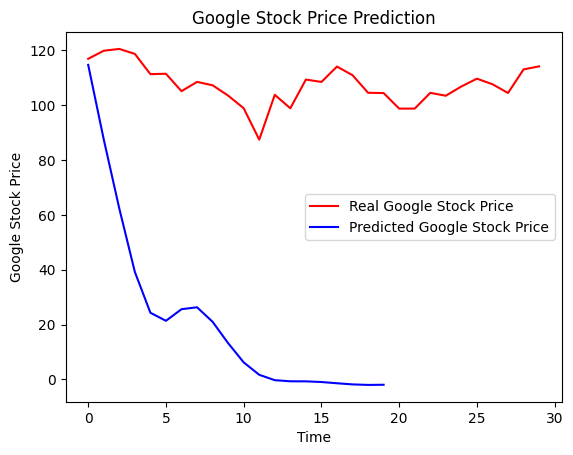

In [24]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()